In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data', index_col = 0)

In [3]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


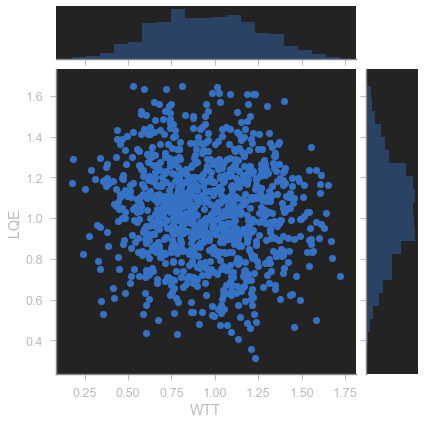

In [4]:
sns.jointplot(x = 'WTT' , y = 'LQE' , data = df)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaled_data = StandardScaler().fit_transform(df.drop('TARGET CLASS' , axis = 1))

In [7]:
scaled_data

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [8]:
X = pd.DataFrame(scaled_data , columns = df.columns[:-1])

In [9]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


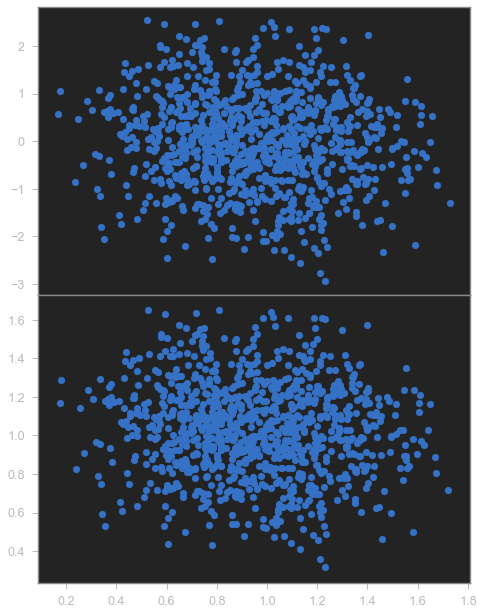

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,1,1,1])
ax2 = fig.add_axes([0,0,1,1])

ax.scatter('WTT' ,  'LQE' , data = X )
ax2.scatter('WTT' ,  'LQE' , data = df )

In [10]:
y = df['TARGET CLASS']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.33)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
kmodel = KNeighborsClassifier()

In [15]:
kmodel.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
kmodel.score(X_test , y_test)

0.9272727272727272

In [17]:
pred = kmodel.predict(X_test)

In [18]:
from sklearn.metrics import classification_report , confusion_matrix

In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       160
           1       0.91      0.95      0.93       170

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330



In [20]:
confusion_matrix(y_test , pred)

array([[144,  16],
       [  8, 162]], dtype=int64)

In [21]:
err = np.mean(pred!= y_test)

In [24]:
err + kmodel.score(X_test , y_test)

1.0

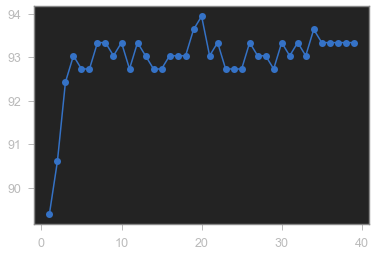

In [34]:
x = 1
score_list = []
while x<40:
    kmodel = KNeighborsClassifier(n_neighbors=x)
    kmodel.fit(X_train , y_train)
    score_list.append(100 * kmodel.score(X_test , y_test))
    x+=1

plt.plot(list(range(1,40)) , score_list , marker = 'o')

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('KNN_Project_Data')

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


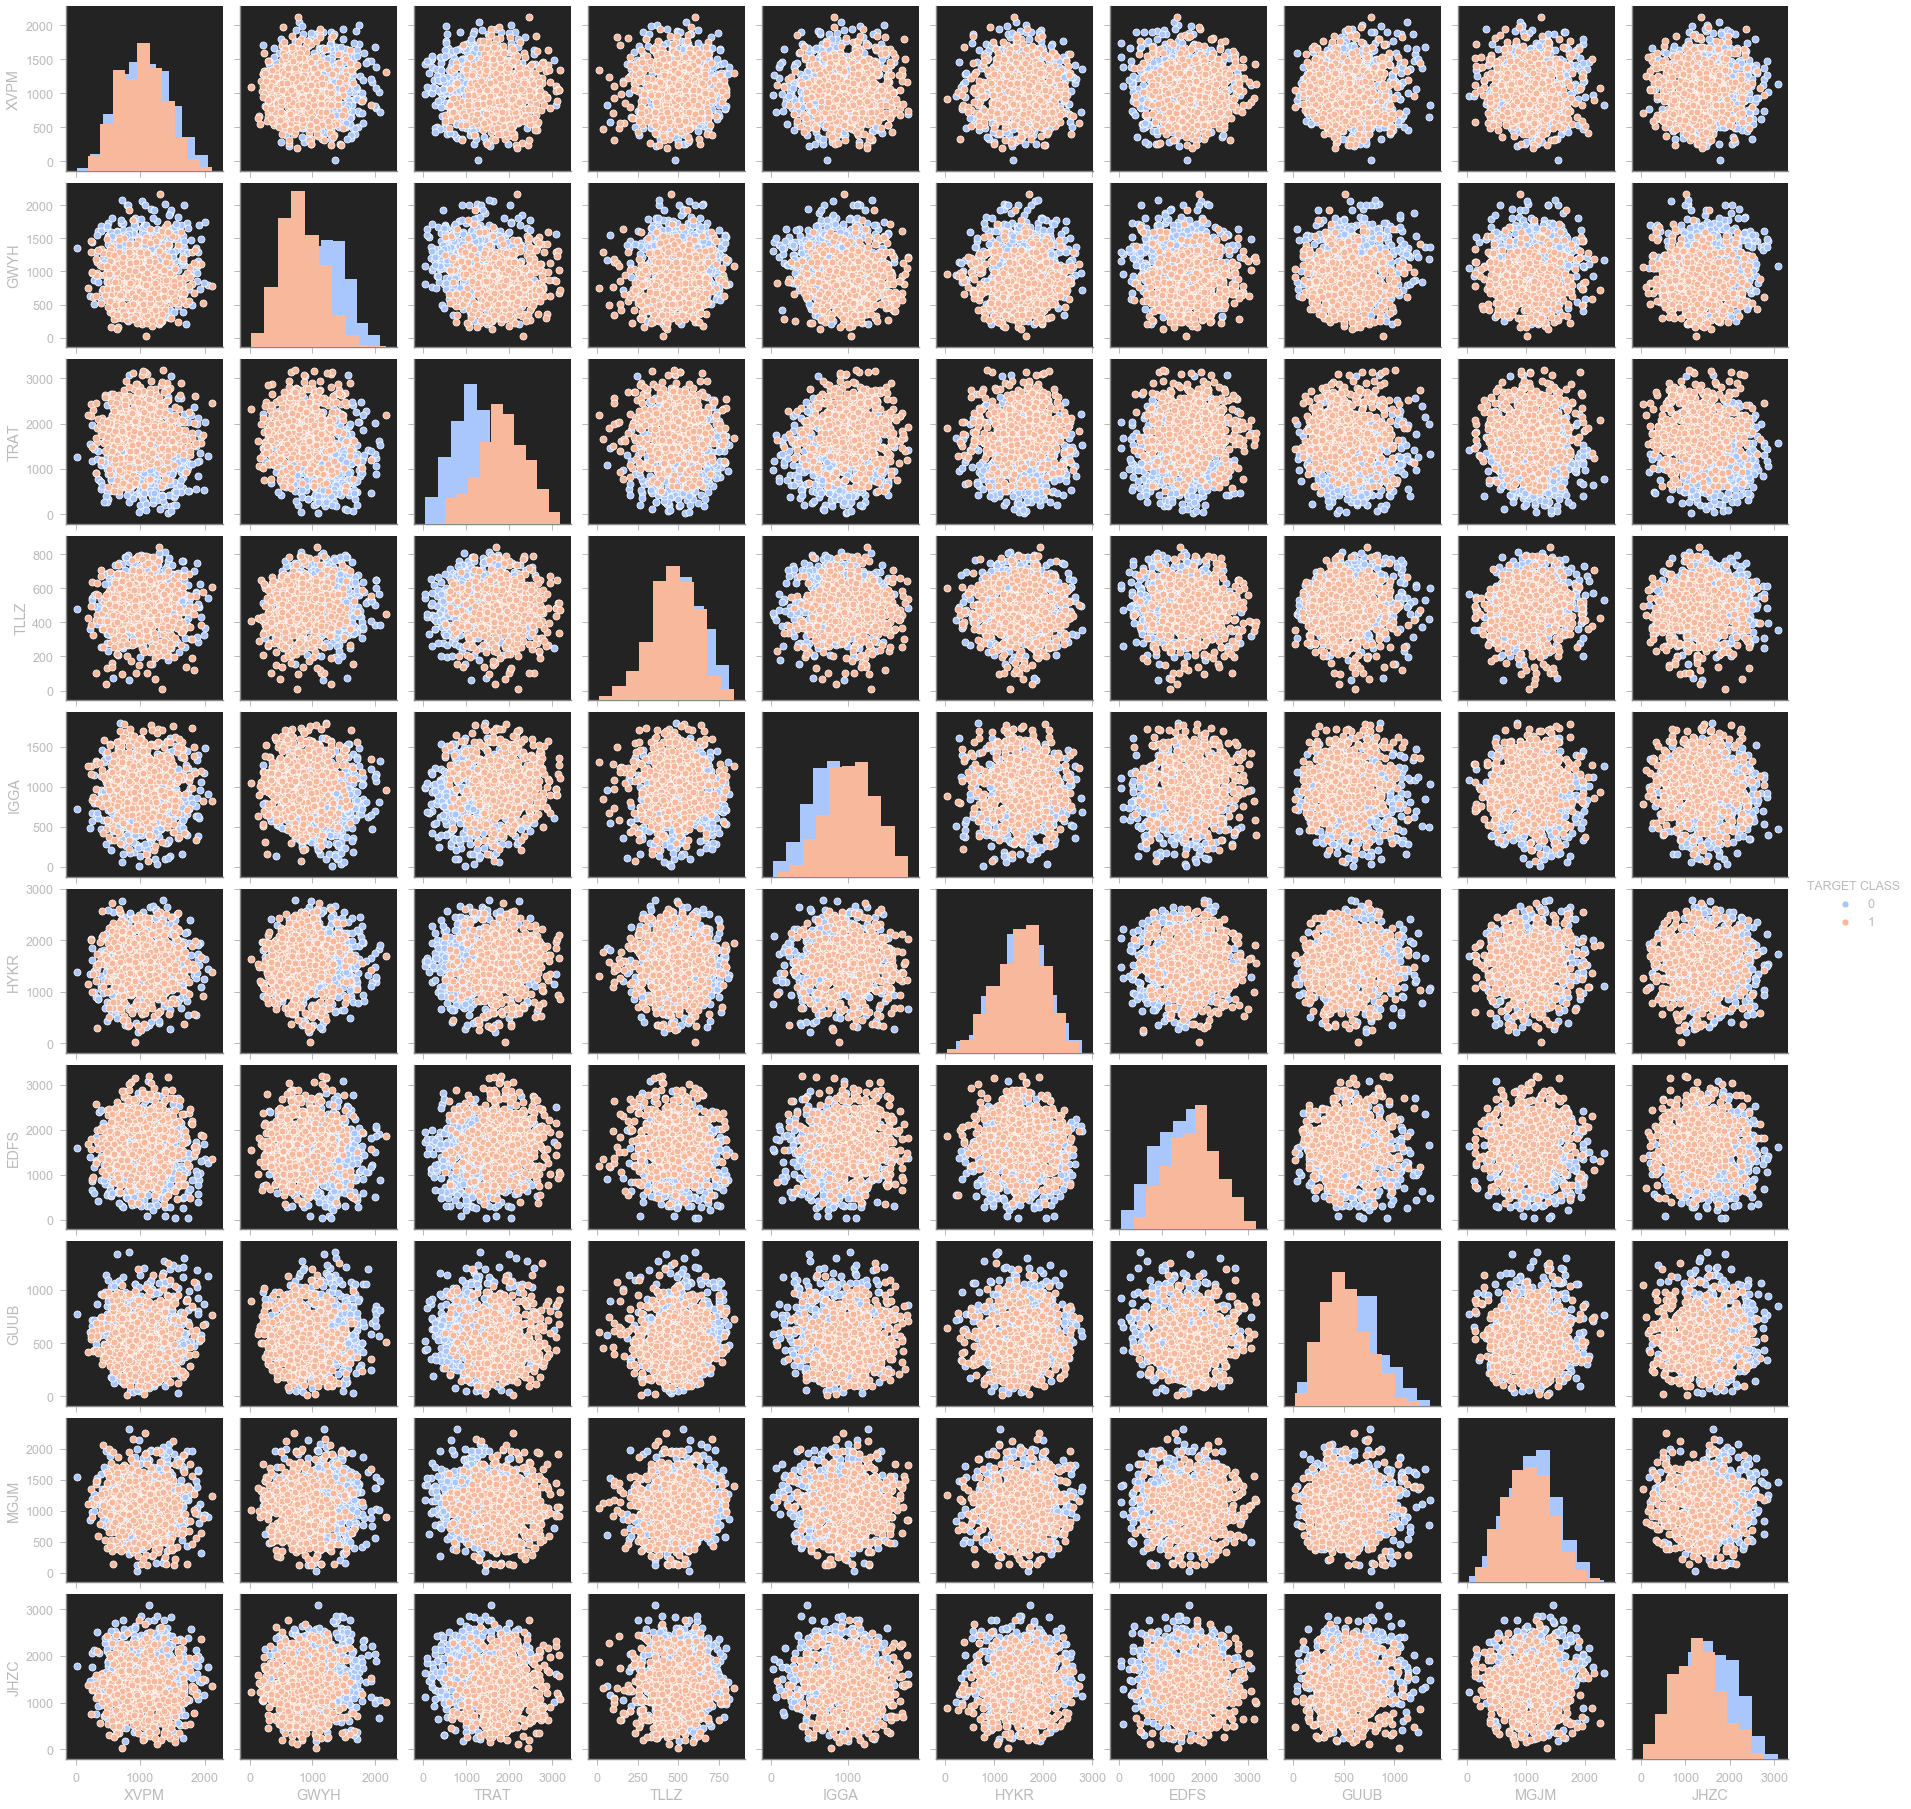

In [82]:
sns.pairplot(data = df , hue = 'TARGET CLASS' , diag_kind='hist' , palette = 'coolwarm')

In [5]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
x = scaler.fit_transform(df.drop('TARGET CLASS' , axis = 1))

In [22]:
X = pd.DataFrame(x , columns = df.columns[:-1]) 

In [23]:
X

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


In [24]:
y = df['TARGET CLASS']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.3)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model = KNeighborsClassifier()

In [29]:
model.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
model.score(X_test , y_test)

0.7633333333333333

In [31]:
pred = model.predict(X_test)

In [35]:
import numpy as np
1- np.mean(pred!=y_test)

0.7633333333333333

In [66]:
from sklearn.metrics import classification_report , confusion_matrix

In [67]:
print(confusion_matrix(y_test , pred))
print(classification_report(y_test,pred))

[[126  27]
 [ 26 121]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       153
           1       0.82      0.82      0.82       147

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



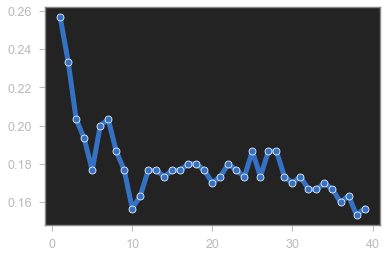

In [79]:
acu = []
for k in list(range(1,40)):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train , y_train)
    acu.append(1- model.score(X_test , y_test))
    
sns.lineplot(list(range(1,40)) , acu , marker ='o' , lw = 5, linestyle = '--')

In [81]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train , y_train)
pred = model.predict(X_test)
print(confusion_matrix(y_test , pred))
print(classification_report(y_test,pred))

[[127  26]
 [ 21 126]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       153
           1       0.83      0.86      0.84       147

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [12]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [14]:
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])